In [11]:
import pandas as pd
df = pd.read_csv('Chocolate Sales.csv')

In [12]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [14]:
df['Amount'] = df['Amount'].str.replace('$', '', regex=False)
df['Amount'] = df['Amount'].str.replace(',', '', regex=False)
df['Amount']

,Amount
0,5320.00
1,7896.00
2,4501.00
3,12726.00
4,13685.00
...,...
3277,5303.58
3278,7339.32
3279,616.09
3280,2504.62


In [15]:
df['Amount'] = df['Amount'].astype(float)

In [16]:
df['Amount']

,Amount
0,5320.00
1,7896.00
2,4501.00
3,12726.00
4,13685.00
...,...
3277,5303.58
3278,7339.32
3279,616.09
3280,2504.62


In [17]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 154.0+ KB


In [22]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

In [23]:
df.head(1)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Year,Month,Month_Name
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022,1,January


In [24]:
df.isna().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0
Year,0
Month,0
Month_Name,0


In [25]:
df.describe()

,Date,Amount,Boxes Shipped,Year,Month
count,3282,3282.000000,3282.000000,3282.000000,3282.000000
mean,2023-05-03 15:09:06.252284928,6030.338775,164.666971,2023.000000,4.576782
min,2022-01-03 00:00:00,7.000000,1.000000,2022.000000,1.000000
25%,2022-07-04 00:00:00,2521.495000,71.000000,2022.000000,3.000000
50%,2023-05-11 00:00:00,5225.500000,137.000000,2023.000000,5.000000
75%,2024-03-02 00:00:00,8556.842500,232.000000,2024.000000,7.000000
max,2024-08-31 00:00:00,26170.950000,778.000000,2024.000000,8.000000
std,NaN,4393.980200,124.024736,0.816621,2.315759


In [27]:
#Total revenue
print(df['Amount'].sum())

19791571.860000003


In [28]:
#Average order value
df['Amount'].mean()

np.float64(6030.338775137113)

In [29]:
#min and max sale
df['Amount'].min(), df['Amount'].max()

(7.0, 26170.95)

In [52]:
#Revenue by country
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

In [33]:
#boxes shipped by country
df.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False)

,Boxes Shipped
Country,
Australia,99618
Canada,95158
UK,92523
India,89968
USA,81820
New Zealand,81350


In [35]:
#Top 5 products by revenue
df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head()

,Amount
Product,
Smooth Sliky Salty,1120201.09
50% Dark Bites,1087659.35
White Choc,1054257.00
Peanut Butter Cubes,1036591.09
Eclairs,996947.96


In [36]:
df.groupby('Product')['Amount'].sum().sort_values(ascending=True).head()

,Amount
Product,
70% Dark Bites,677346.22
Caramel Stuffed Bars,742516.15
Choco Coated Almonds,773062.91
Baker's Choco Chips,799085.67
Drinking Coco,822245.57


In [39]:
#Average sale per product
df.groupby('Product')['Amount'].mean().sort_values(ascending=False)

,Amount
Product,
Peanut Butter Cubes,7051.640068
Mint Chip Choco,6703.626296
Choco Coated Almonds,6607.375299
Manuka Honey Choco,6557.096519
99% Dark & Pure,6530.839796
Baker's Choco Chips,6496.631463
85% Dark Bars,6368.454933
Smooth Sliky Salty,6328.819718
Almond Choco,6183.712847


In [43]:
#Which salesperson generated most revenue
df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(1)

,Amount
Sales Person,
Ches Bonnell,1022599.96


In [44]:
#Who shipped most boxes
df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False).head(1)

,Boxes Shipped
Sales Person,
Karlen McCaffrey,29553


In [46]:
#Who has the highest average deal size
df.groupby('Sales Person')['Amount'].mean().sort_values(ascending=False).head(1)

,Amount
Sales Person,
Madelene Upcott,7481.694222


In [49]:
#Sales above average sales
avg_sales = df['Amount'].mean()
df[df['Amount'] > avg_sales]

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Year,Month,Month_Name
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.00,94,2022,8,August
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.00,342,2022,4,April
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.00,184,2022,2,February
6,Oby Sorrel,UK,99% Dark & Pure,2022-01-25,13685.00,176,2022,1,January
14,Marney O'Breen,New Zealand,Peanut Butter Cubes,2022-08-03,8379.00,173,2022,8,August
...,...,...,...,...,...,...,...,...,...
3271,Madelene Upcott,New Zealand,Milk Bars,2024-03-29,13541.21,434,2024,3,March
3272,Roddy Speechley,India,50% Dark Bites,2024-03-14,9976.22,12,2024,3,March
3273,Barr Faughny,New Zealand,99% Dark & Pure,2024-05-24,9152.72,208,2024,5,May
3274,Dennison Crosswaite,Canada,Organic Choco Syrup,2024-01-28,9251.37,79,2024,1,January


In [50]:
#Orders above $10000
df[df['Amount'] > 10000]

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Year,Month,Month_Name
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.00,342,2022,4,April
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.00,184,2022,2,February
6,Oby Sorrel,UK,99% Dark & Pure,2022-01-25,13685.00,176,2022,1,January
31,Rafaelita Blaksland,UK,99% Dark & Pure,2022-06-29,12446.00,150,2022,6,June
41,Karlen McCaffrey,USA,Raspberry Choco,2022-04-15,14749.00,354,2022,4,April
...,...,...,...,...,...,...,...,...,...
3255,Camilla Castle,New Zealand,85% Dark Bars,2024-08-08,17841.92,53,2024,8,August
3263,Roddy Speechley,India,Spicy Special Slims,2024-03-22,12049.05,180,2024,3,March
3265,Oby Sorrel,Canada,Orange Choco,2024-04-27,10257.74,328,2024,4,April
3269,Dennison Crosswaite,USA,Smooth Sliky Salty,2024-05-12,12755.99,99,2024,5,May


In [51]:
#Monthly Sales
df.groupby('Month_Name')['Amount'].sum()

,Amount
Month_Name,
April,2161927.22
August,2366851.06
February,2232096.90
January,2868712.59
July,2567532.29
June,2773931.94
March,2404769.29
May,2415750.57


In [53]:
import matplotlib.pyplot as plt

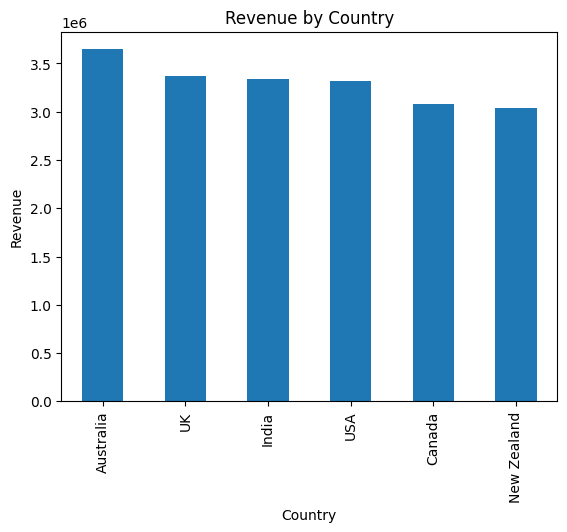

In [54]:
country_sales.plot(kind='bar')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()